In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [94]:
ET_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla_20220606\\detections_ZTF18abvkwla.csv")
ND_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla_20220606\\non_detections_ZTF18abvkwla.csv")
plotname = ET_1
non_detection = ND_1
non_detection

,tid,mjd,fid,diffmaglim
0,ztf,58357.432535,2,19.8542
1,ztf,58357.503276,2,19.6899
2,ztf,58363.464618,2,20.0345
3,ztf,58366.379363,2,20.5537
4,ztf,58366.414479,1,20.7672
5,ztf,58366.452257,1,20.9358
6,ztf,58367.453345,1,20.8005
7,ztf,58369.403183,2,20.5869
8,ztf,58369.475694,1,20.9667
9,ztf,58372.390741,2,20.6107


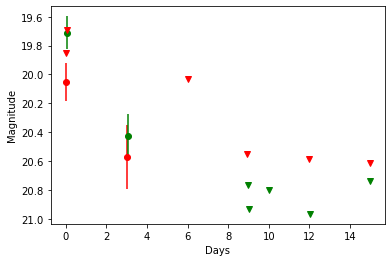

In [95]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-non_detection['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-non_detection['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


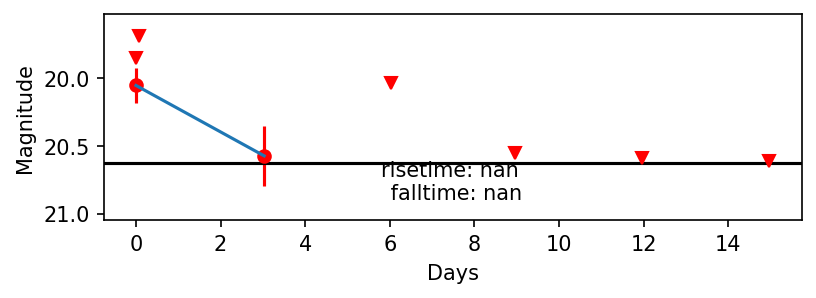

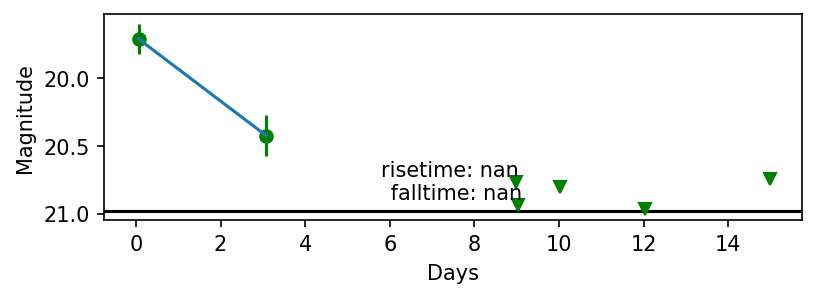

In [96]:
# red filter for transient 1

plotname = ET_1
non_detection = ND_1

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-non_detection['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 5
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
magdiff = 2.5 * np.log10(2)
minmag_index = int(np.argwhere(y_vals == minmag))

mintime = x_vals[minmag_index]
halfmag = minmag + magdiff
#print(f"minmag {minmag}")

nd_y_vals = np.array(nd_y_vals)
nd_x_vals = np.array(nd_x_vals)

nd_minmag = np.min(nd_y_vals)
abs_minmag = (minmag + nd_minmag)/2
halfmag = abs_minmag + magdiff
#print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
good_xvals = np.array([])
for i, xval in enumerate(x_interp):
    if np.abs(y_interp[i] - halfmag) < 0.05:
        good_xvals = np.append(good_xvals, xval)

#print(good_xvals)

half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

risetime = mintime - half_rising_JD
falltime = half_falling_JD - mintime

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points

x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)



# green filter for transient 1
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-non_detection['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 5
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
magdiff = 2.5 * np.log10(2)
minmag_index = int(np.argwhere(y_vals == minmag))

mintime = x_vals[minmag_index]
halfmag = minmag + magdiff
#print(f"minmag {minmag}")

nd_y_vals = np.array(nd_y_vals)
nd_x_vals = np.array(nd_x_vals)

nd_minmag = np.min(nd_y_vals)
abs_minmag = (minmag + nd_minmag)/2
halfmag = abs_minmag + magdiff
#print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
good_xvals = np.array([])
for i, xval in enumerate(x_interp):
    if np.abs(y_interp[i] - halfmag) < 0.05:
        good_xvals = np.append(good_xvals, xval)

#print(good_xvals)

half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

risetime = mintime - half_rising_JD
falltime = half_falling_JD - mintime

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [97]:
ET_2 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abcfcoo_20220606\\detections_ZTF18abcfcoo.csv")
ND_2 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abcfcoo_20220606\\non_detections_ZTF18abcfcoo.csv")
plotname = ET_2
non_detection = ND_2
non_detection


,tid,mjd,fid,diffmaglim
0,ztf,58258.393171,2,20.3282
1,ztf,58261.314352,2,19.9832
2,ztf,58270.338391,2,19.8654
3,ztf,58273.333542,2,20.3285
4,ztf,58276.294120,2,20.7118
...,...,...,...,...
211,ztf,59399.228472,2,20.6404
212,ztf,59401.315498,2,20.5403
213,ztf,59403.309988,2,20.4281
214,ztf,59407.192454,2,20.5352


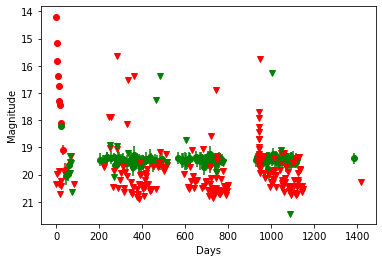

In [98]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-non_detection['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-non_detection['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')

plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


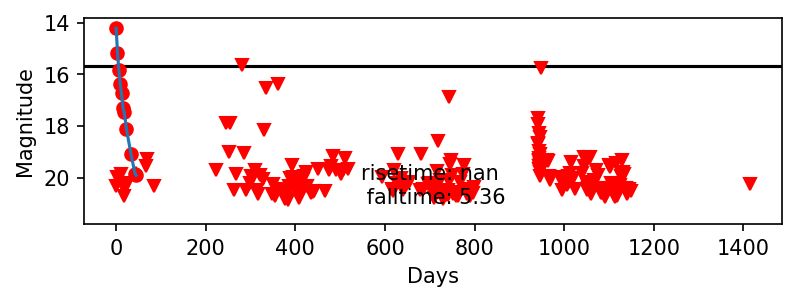

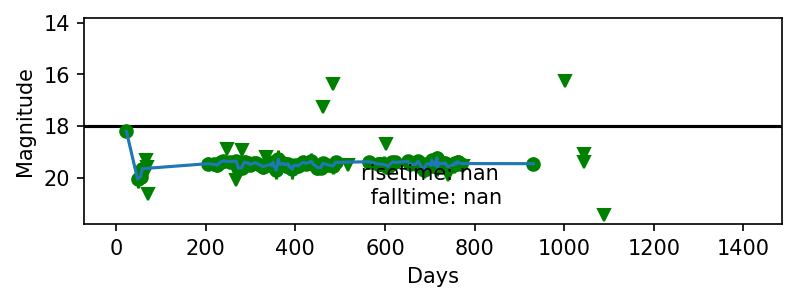

In [99]:
# red filter for transient 1

plotname = ET_2
non_detection = ND_2

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-non_detection['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]


#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
magdiff = 2.5 * np.log10(2)
minmag_index = int(np.argwhere(y_vals == minmag))

mintime = x_vals[minmag_index]
halfmag = minmag + magdiff
#print(f"minmag {minmag}")

nd_y_vals = np.array(nd_y_vals)
nd_x_vals = np.array(nd_x_vals)

nd_minmag = np.min(nd_y_vals)
abs_minmag = (minmag + nd_minmag)/2
halfmag = abs_minmag + magdiff
#print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
good_xvals = np.array([])
for i, xval in enumerate(x_interp):
    if np.abs(y_interp[i] - halfmag) < 0.05:
        good_xvals = np.append(good_xvals, xval)

#print(good_xvals)

half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

risetime = mintime - half_rising_JD
falltime = half_falling_JD - mintime

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)


# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)



# green filter for transient 1
# This is the code for the second plot


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-non_detection['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
magdiff = 2.5 * np.log10(2)
minmag_index = int(np.argwhere(y_vals == minmag))

mintime = x_vals[minmag_index]
halfmag = minmag + magdiff
#print(f"minmag {minmag}")

nd_y_vals = np.array(nd_y_vals)
nd_x_vals = np.array(nd_x_vals)

nd_minmag = np.min(nd_y_vals)
abs_minmag = (minmag + nd_minmag)/2
halfmag = abs_minmag + magdiff
#print(f"halfmag {halfmag}")

# define interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
good_xvals = np.array([])
for i, xval in enumerate(x_interp):
    if np.abs(y_interp[i] - halfmag) < 0.05:
        good_xvals = np.append(good_xvals, xval)

#print(good_xvals)

half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

risetime = mintime - half_rising_JD
falltime = half_falling_JD - mintime

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [88]:
ET_3 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20acigmel_20220606\\detections_ZTF20acigmel.csv")
ND_3 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20acigmel_20220606\\non_detections_ZTF20acigmel.csv")

non_detection = ND_3
non_detection
plotname = ET_3

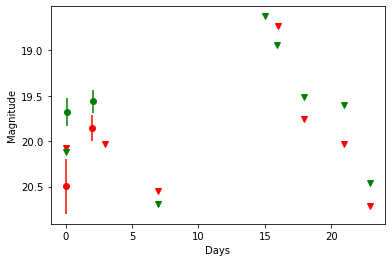

In [89]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-non_detection['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-non_detection['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')

plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


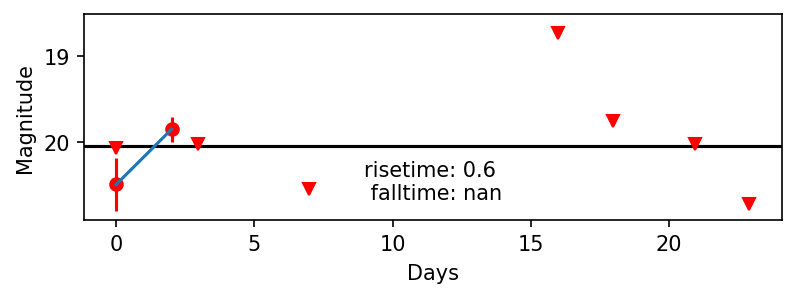

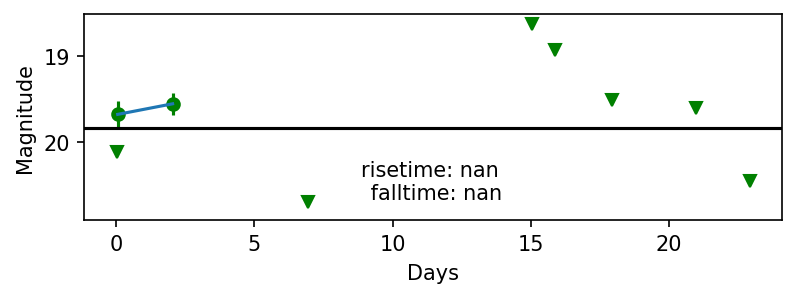

In [90]:
# red filter for transient 3

plotname = ET_3
non_detection = ND_3

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-non_detection['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
magdiff = 2.5 * np.log10(2)
minmag_index = int(np.argwhere(y_vals == minmag))

mintime = x_vals[minmag_index]
#print(f"minmag {minmag}")

nd_y_vals = np.array(nd_y_vals)
nd_x_vals = np.array(nd_x_vals)

nd_minmag = np.min(nd_y_vals)
abs_minmag = (minmag + nd_minmag)/2
halfmag = abs_minmag + magdiff
#print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
good_xvals = np.array([])
for i, xval in enumerate(x_interp):
    if np.abs(y_interp[i] - halfmag) < 0.05:
        good_xvals = np.append(good_xvals, xval)

#print(good_xvals)

half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

risetime = mintime - half_rising_JD
falltime = half_falling_JD - mintime

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for transient 3
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-non_detection['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
magdiff = 2.5 * np.log10(2)
minmag_index = int(np.argwhere(y_vals == minmag))

mintime = x_vals[minmag_index]
halfmag = minmag + magdiff
#print(f"minmag {minmag}")

nd_y_vals = np.array(nd_y_vals)
nd_x_vals = np.array(nd_x_vals)

nd_minmag = np.min(nd_y_vals)
abs_minmag = (minmag + nd_minmag)/2
halfmag = abs_minmag + magdiff
#print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
good_xvals = np.array([])
for i, xval in enumerate(x_interp):
    if np.abs(y_interp[i] - halfmag) < 0.05:
        good_xvals = np.append(good_xvals, xval)

#print(good_xvals)

half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

risetime = mintime - half_rising_JD
falltime = half_falling_JD - mintime

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()

In [91]:
ET_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\detections_ZTF20abfhyil.csv")
ND_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\non_detections_ZTF20abfhyil.csv")

non_detection = ND_4
non_detection

plotname = ET_4

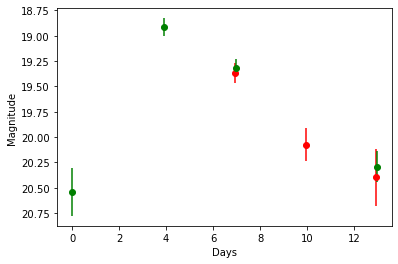

In [92]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


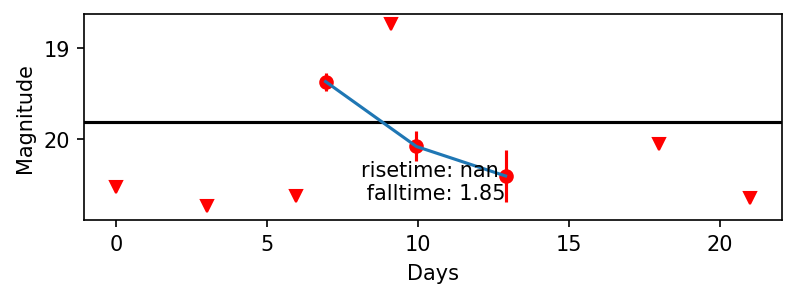

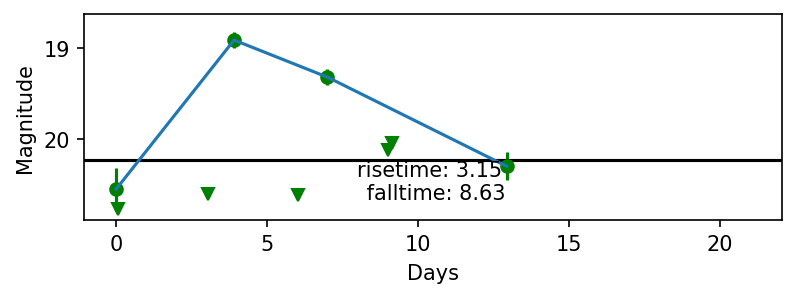

In [93]:
# red filter for transient 4

plotname = ET_4
non_detection = ND_4

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-non_detection['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
magdiff = 2.5 * np.log10(2)
minmag_index = int(np.argwhere(y_vals == minmag))

mintime = x_vals[minmag_index]
halfmag = minmag + magdiff
#print(f"minmag {minmag}")

nd_y_vals = np.array(nd_y_vals)
nd_x_vals = np.array(nd_x_vals)

nd_minmag = np.min(nd_y_vals)
abs_minmag = (minmag + nd_minmag)/2
halfmag = abs_minmag + magdiff
#print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
good_xvals = np.array([])
for i, xval in enumerate(x_interp):
    if np.abs(y_interp[i] - halfmag) < 0.05:
        good_xvals = np.append(good_xvals, xval)

#print(good_xvals)

half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

risetime = mintime - half_rising_JD
falltime = half_falling_JD - mintime

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel("Magnitude")
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax1.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)


# green filter for transient 4
# This is the code for the second plot

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-non_detection['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
magdiff = 2.5 * np.log10(2)
minmag_index = int(np.argwhere(y_vals == minmag))

mintime = x_vals[minmag_index]
halfmag = minmag + magdiff
#print(f"minmag {minmag}")

nd_y_vals = np.array(nd_y_vals)
nd_x_vals = np.array(nd_x_vals)

nd_minmag = np.min(nd_y_vals)
abs_minmag = (minmag + nd_minmag)/2
halfmag = abs_minmag + magdiff
#print(f"halfmag {halfmag}")

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# finding rise and fall time using average of nearby points
good_xvals = np.array([])
for i, xval in enumerate(x_interp):
    if np.abs(y_interp[i] - halfmag) < 0.05:
        good_xvals = np.append(good_xvals, xval)

#print(good_xvals)

half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])

risetime = mintime - half_rising_JD
falltime = half_falling_JD - mintime

# cleaning up the numbers
risetime = round(risetime, 2)
falltime = round(falltime, 2)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel("Magnitude")
plt.subplot(2,1,2)
plt.gca().invert_yaxis()

# line marks halfway to full brightness 
ax2.axhline(float(halfmag), c='black')

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

# Adding text to plot
textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

#formatting axes
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)
plt.show()